### **Import** **Libraries**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
crime = pd.read_csv('crime_safety_dataset.csv')
crime

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-02-23,07:24:57,Assault,New York,NY,2793 Oak St,72,Female,Asian
996,997,2024-10-15,18:10:35,Drug Offense,San Jose,CA,2798 Elm St,26,Male,Other
997,998,2024-02-08,04:00:11,Assault,Houston,TX,8950 Pine St,34,Non-binary,Hispanic
998,999,2023-01-18,16:52:36,Homicide,Chicago,IL,4673 Oak St,16,Other,Hispanic


In [140]:
crime.head() #Quick check on how the top of the dataset looks

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [141]:
crime.tail() #Quick check on how the bottom of the dataset looks

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
995,996,2023-02-23,07:24:57,Assault,New York,NY,2793 Oak St,72,Female,Asian
996,997,2024-10-15,18:10:35,Drug Offense,San Jose,CA,2798 Elm St,26,Male,Other
997,998,2024-02-08,04:00:11,Assault,Houston,TX,8950 Pine St,34,Non-binary,Hispanic
998,999,2023-01-18,16:52:36,Homicide,Chicago,IL,4673 Oak St,16,Other,Hispanic
999,1000,2022-07-19,01:28:45,Homicide,Los Angeles,CA,5226 Oak St,54,Male,White


In [142]:
crime.shape #There are 1,000 rows and 10 columns

(1000, 10)

### **Exploring** **the** **Dataset**

In [143]:
crime.info() #Summary info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [144]:
crime.date = pd.to_datetime(crime.date) #Converting the date column to a datetime object
crime.date

,date
0,2022-09-09
1,2022-07-10
2,2024-12-31
3,2024-04-12
4,2023-07-19
...,...
995,2023-02-23
996,2024-10-15
997,2024-02-08
998,2023-01-18


In [145]:
crime.info() #Sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1000 non-null   int64         
 1   date                  1000 non-null   datetime64[ns]
 2   time                  1000 non-null   object        
 3   crime_type            1000 non-null   object        
 4   city                  1000 non-null   object        
 5   state                 1000 non-null   object        
 6   location_description  1000 non-null   object        
 7   victim_age            1000 non-null   int64         
 8   victim_gender         1000 non-null   object        
 9   victim_race           1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 78.3+ KB


In [146]:
crime.describe() #Summary info on the numeric columns of the dataset

,id,date,victim_age
count,1000.000000,1000,1000.000000
mean,500.500000,2023-01-19 22:30:43.199999744,52.201000
min,1.000000,2020-07-31 00:00:00,12.000000
25%,250.750000,2021-10-25 00:00:00,33.000000
50%,500.500000,2023-01-10 12:00:00,53.000000
75%,750.250000,2024-04-29 06:00:00,72.000000
max,1000.000000,2025-07-26 00:00:00,90.000000
std,288.819436,NaN,22.913831


In [147]:
crime.describe(include='object') #Summary info on the object columns of the dataset

,time,crime_type,city,state,location_description,victim_gender,victim_race
count,1000,1000,1000,1000,1000,1000,1000
unique,996,10,10,6,988,4,5
top,13:17:28,Domestic Violence,Dallas,TX,1537 Main St,Male,Other
freq,2,121,106,307,2,272,211


In [148]:
crime.columns

Index(['id', 'date', 'time', 'crime_type', 'city', 'state',
       'location_description', 'victim_age', 'victim_gender', 'victim_race'],
      dtype='object')

In [149]:
 #Checking the number of crimes per type
crime.crime_type.value_counts() #Domestic Violence & Burglaries are most common

,count
crime_type,
Domestic Violence,121
Burglary,121
Robbery,101
Homicide,101
Arson,98
Assault,97
Vandalism,94
Fraud,89
Drug Offense,89


### Data Visualization

Text(0.5, 1.0, 'Top 5 Crime Types')

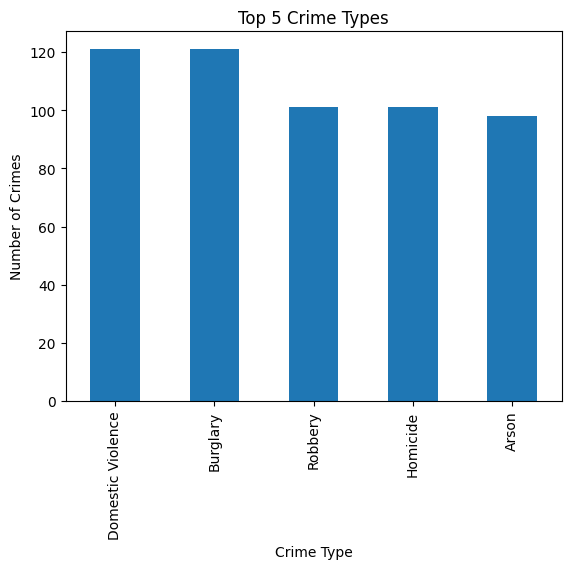

In [150]:
#Creating a bar chart to display top 5 crime types
crime_high = crime.crime_type.value_counts()[:5]
crime_high.plot(kind='bar')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Crime Types')

Text(0.5, 1.0, 'Bottom 5 Crime Types')

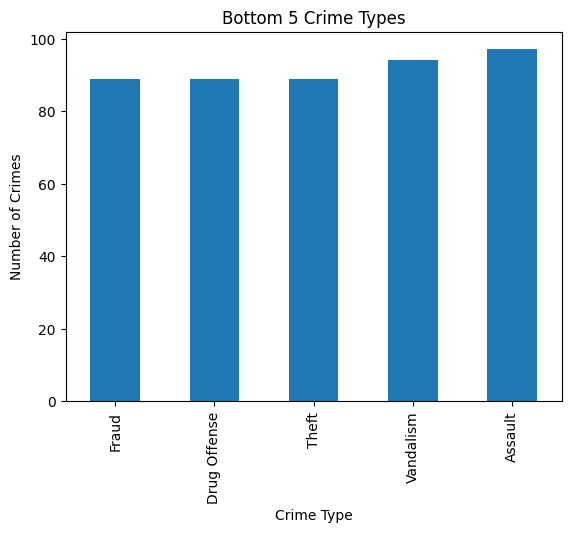

In [151]:
#Creating a bar chart to display the bottom 5 crime types
crime_low = crime.crime_type.value_counts().sort_values(ascending=True)[:5]
crime_low.plot(kind='bar')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Bottom 5 Crime Types')

In [152]:
#Most common cities with assult crime types
assault = crime[crime.crime_type == 'Assault']
assault.city.value_counts()[:5]

,count
city,
Los Angeles,16
San Jose,13
Houston,12
San Diego,11
New York,9


Text(0.5, 1.0, 'Top 5 Cities With Most Crime')

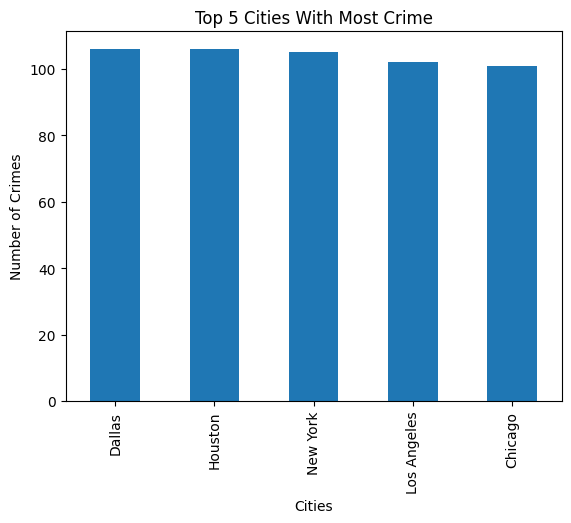

In [153]:
#Creating a bar chart to compare the most crimes in cities
crime_cities_high = crime.city.value_counts()[:5]
crime_cities_high.plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Cities With Most Crime')


Text(0.5, 1.0, 'Top 5 Cities With Lowest Crime')

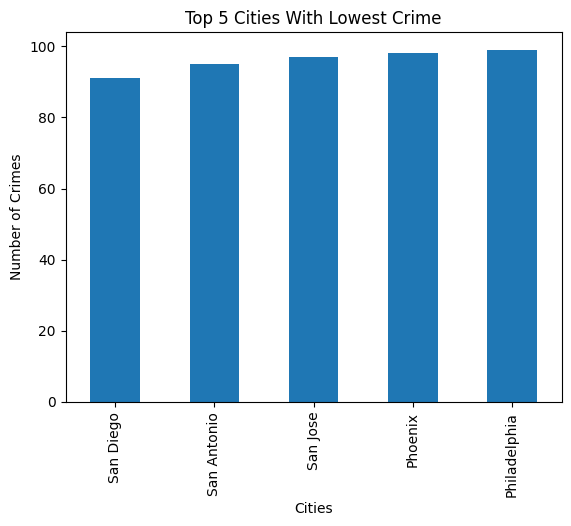

In [154]:
#Creating a bar chart to compare the lowest crimes in cities
crime_cities_low = crime.city.value_counts().sort_values(ascending=True)[:5]
crime_cities_low.plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Cities With Lowest Crime')

Text(0.5, 1.0, 'Top 5 Victim Ages')

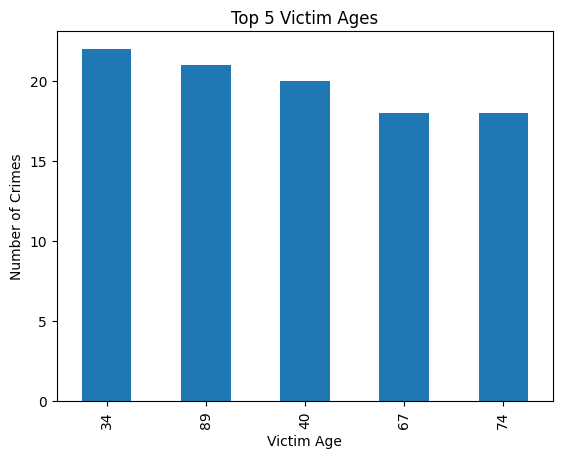

In [155]:
#Creating a chart for the most common victim ages
victim = crime.victim_age.value_counts()[:5]
victim.plot(kind='bar')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Victim Ages')

In [156]:
#Creating a chart for the types of crimes per victim ages
crime_victim = crime.groupby('victim_age')['crime_type'].value_counts()
crime_victim

victim_age  crime_type       
12          Assault              3
            Arson                2
            Drug Offense         1
            Fraud                1
            Robbery              1
                                ..
90          Homicide             2
            Robbery              2
            Domestic Violence    1
            Drug Offense         1
            Fraud                1
Name: count, Length: 568, dtype: int64

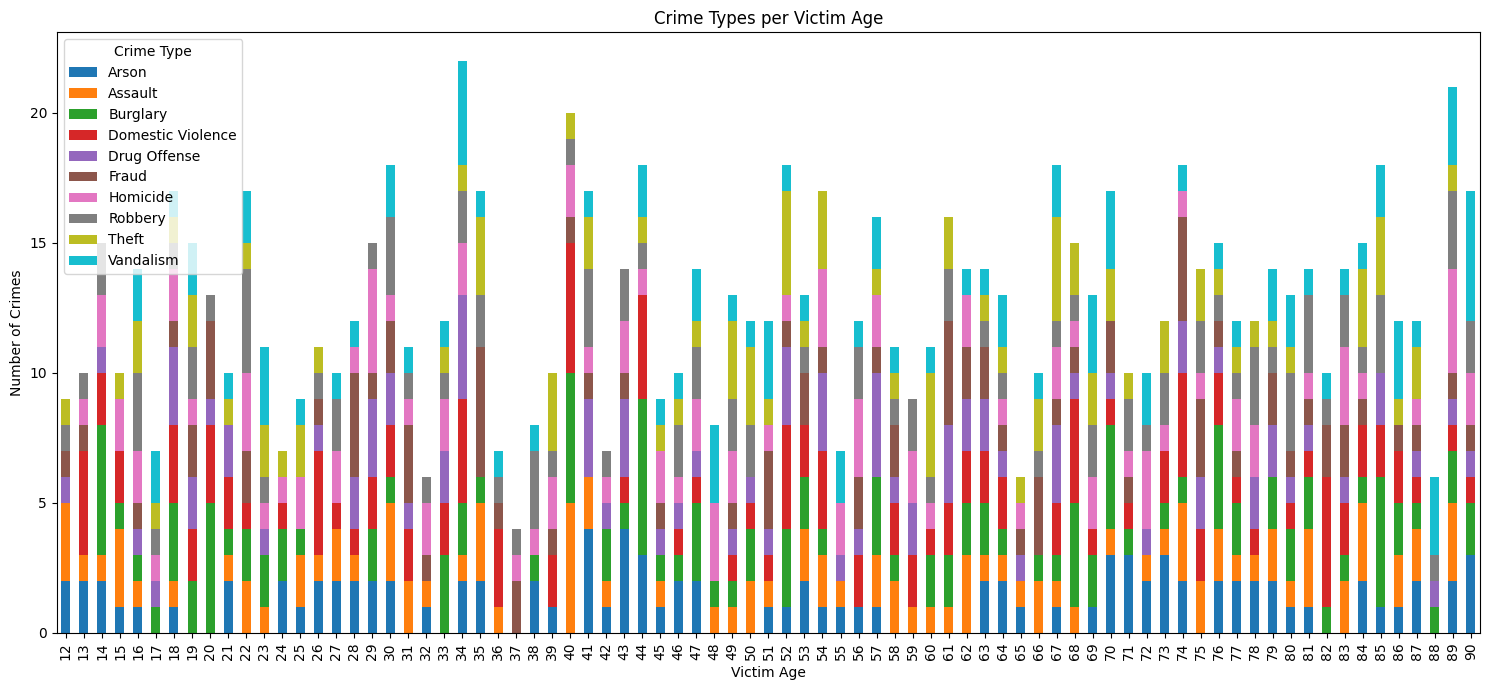

In [157]:
#Creating a chart for the types of crimes per victim ages
crime_victim = crime.groupby('victim_age')['crime_type'].value_counts().unstack()
crime_victim.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.title('Crime Types per Victim Age')
plt.legend(title='Crime Type', loc='upper left')
plt.tight_layout()

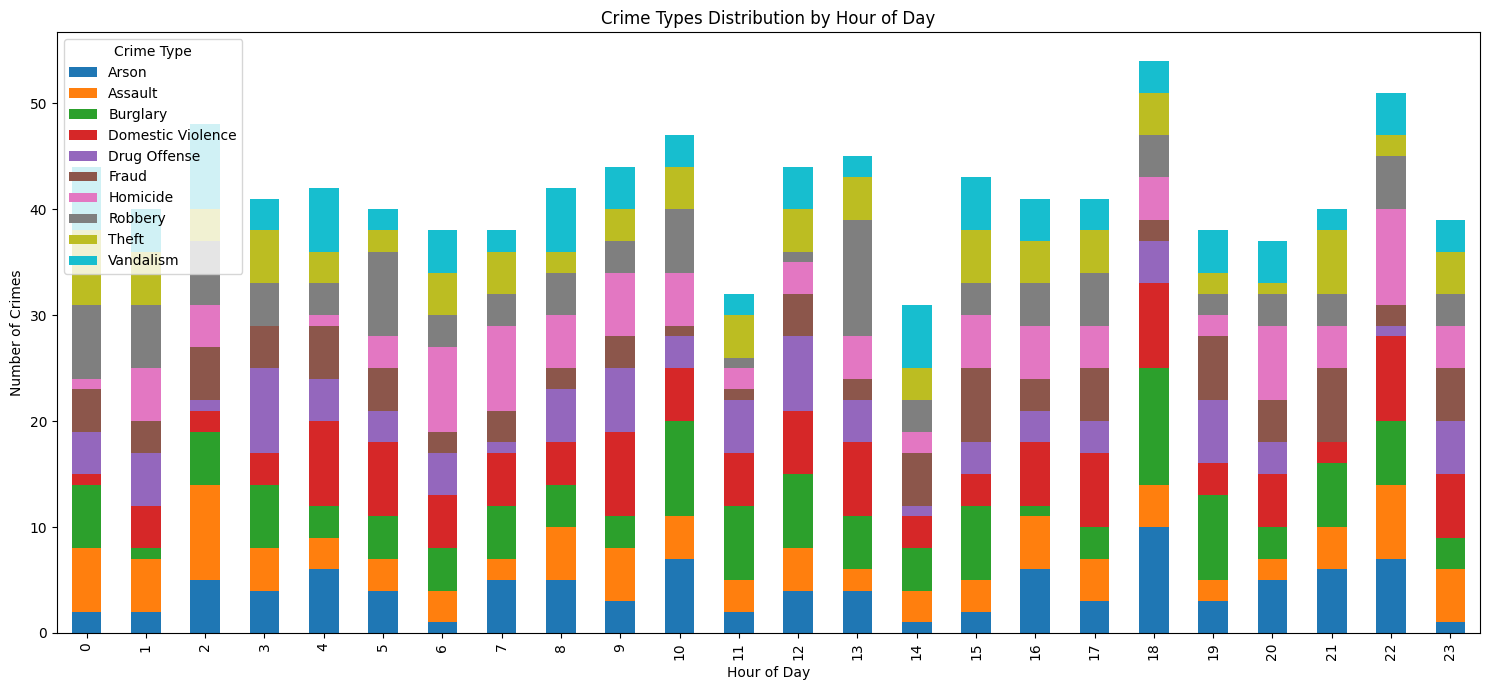

In [158]:
#Creating a bar chart to show distribution of crime types by hour of day
crime_by_hour_type.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Crime Types Distribution by Hour of Day')
plt.legend(title='Crime Type', loc='upper left')
plt.tight_layout()

### **Summary**

Based on the dataset:

*   **Most Common Crimes**: Burglaries and Domestic Violence are the most frequent crimes, both occurring 121 times.
    *   *Hypothesis:* Property-related crimes (Burglary, Robbery) are just as prevalent as interpersonal crimes (Domestic Violence, Homicide).
*   **Cities with Most Crime**: Houston and Dallas have the highest reported crime rates at 106 cases each.
    *   *Hypothesis:* Large urban areas and high-population states tend to have higher crime counts due to population density.
*   **Victim Age Analysis**:
    *   The average age of victims is 52 years, with a range from 12 to 90 years old.
    *   Average victim age varies by crime type:
        *   Vandalism victims are older on average (~56 years).
        *   Homicide victims skew slightly younger (~49 years).
        *   Theft victims are older (~54 years).
    *   *Hypothesis:* Elderly populations may be more vulnerable to property crimes (Theft, Vandalism), while violent crimes (Homicide) may affect relatively younger individuals.
*   **Dataset Limitations**: This dataset includes 10 columns but lacks information on:
    *   Population context
    *   Reporting bias over time
    *   Offender demographics and relationships between victims and offenders (the data is victim-centered)